<a href="https://colab.research.google.com/github/spacemaninSeoul/PythonMachinelearningGuide/blob/main/%5B%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C%5D_VII_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. K-평균 알고리즘 이해

K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘이다. **K-평균**은 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법이다.

군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행한다. 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법이다.

K-평균의 장점
 - 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.
 - 알고리즘이 쉽고 간결하다.

K-평균의 단점
 - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다(이를 위해 PCA로 차원 감소를 적용해야 할 수도 있다)
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려진다.
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어렵다.



## 1) 사이킷런 KMeans 클래스 소개

사이킷런 패키지는 K-평균을 구현하기 위해 KMeans 클래스를 제공한다. KMeans 클래스는 다음과 같은 초기화 파라미터를 가진다.

In [ ]:
'''
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

SyntaxError: ignored

이 중 중요 파라미터는 다음과 같다.
 - KMeans 초기화 파라미터 중 가장 중요한 파라미터는 **n_clusters**이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미한다.
  - **init**은 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정한다.
  - **max_iter**는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.

KMeans는 사이킷런의 비지도학습 클래스와 마찬가지로 fit(데이터 세트) 또는 fit_transform(데이터 세트) 메서드를 이용해 수행하면 된다. 이렇게 수행된 KMeans 객체는 군집화 수행이 완료돼 군집화와 관련된 주요 속성을 알 수 있다. 다음은 이 주요 속성 정보이다.
 - **labels_** : 각 데이터 포인트가 속한 군집 중심점 레이블
 - **cluster_centers_** : 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있다.

## 2) K-평균을 이용한 붓꽃 데이터 세트 군집화

붓꽃 데이터 세트는 붓꽃의 꽃받침(sepal)과 꽃잎(petal) 길이와 너비에 따른 품종을 분류하는 데이터 세트이다. 꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인해 보고, 이를 분류 값과 비교한다.

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


붓꽃 데이터 세트를 3개 그룹으로 군집화한다.

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

fit( )을 수행한 irisDF 데이터에 대한 군집화 수행 결과가 kmeans 객체 변수로 반환됐다.
kmeans의 labels_ 속성값을 확인해 보면 irisDF의 각 데이터가 어떤 중심에 속하는지를 알 수 있다.

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지 군집화가 효과적으로 됐는지 확인한다. 붓꽃 데이터 세트의 target 값을 'target' 칼럼으로, 앞에서 구한 labels_ 값을 'cluster' 칼럼으로 지정해 irisDF DataFrame에 추가한 뒤 group by 연산을 실제 분류값인 target과 군집화 분류값인 cluster 레벨로 적용해 target과 cluster 값 개수를 비교한다.

In [ ]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


붓꽃 데이터 세트의 군집화를 시각화한다. PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤에 X 좌표, Y 좌표로 개별 데이터를 표현하도록 한다.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


pca_x는 X 좌표 값, pca_y는 y 좌표 값을 나타낸다.

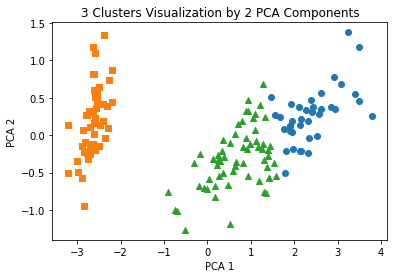

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## 3) 군집화 알고리즘 테스트를 위한 데이터 생성

사이킷런은 다양한 유형의 군집화 알고리즘을 테스트하기 위해 간단한 데이터 생성기를 제공한다. 대표적인 군집화용 데이터 생성기로는 **make_blobs( )**와 make_classification( )** API가 있다. 둘 중 어떤 것을 사용하든 큰 차이는 없지만, make_blobs( )는 개별 군집의 중심점과 표준 편차 제어 기능이 추가돼 있으며 make_classification( )은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있다.

make_blobs( )의 간략한 사용법을 알아보며 군집화를 위한 테스트 데이터 세트를 만드는 방법을 살펴본다. make_blobs( )를 호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플(Tuple)로 반환된다. make_blobs( )의 호출 파라미터는 다음과 같다.

- n_sample : 생성할 총 데이터 개수. 디폴트는 100개이다.
- n_features : 데이터의 피처 개수.
- centers : int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타낸다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미한다.
- cluster_std : 생성될 군집 데이터의 표준 편차. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어진다. [0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8. 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준 편차는 0.6으로 만든다. 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용한다.

X, y = make_blobs(n_samples=200, n_features=2, centers=3, random_state=0)을 호출하면 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와, 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환된다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
# 데이터 가공을 편리하게 하기 위해 위 데이터 세트를 DataFrame으로 변경한다.
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.733808,3.798061,2
1,0.628358,4.460136,0
2,1.131218,4.681950,0


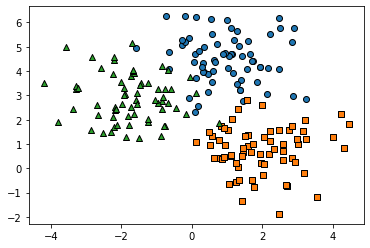

In [ ]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target=0, target=1, target=2 로 scatter plot을 marker 별로 생성.
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolors='k', marker=markers[target])
plt.show()

이번에는 이렇게 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤에 군집별로 시각화한다. 먼저 KMeans 객체에 fit_predict(X)를 수행해 make_blobs( )의 피처 데이터 세트인 X 데이터를 군집화한다. 이를 clusterDF DataFrame에 'kmeans_label' 칼럼으로 저장한다. 그리고 KMeans 객체의 **cluster_centers_** 속성은 개별 군집의 중심 위치 좌표를 나타내기 위해 사용한다.

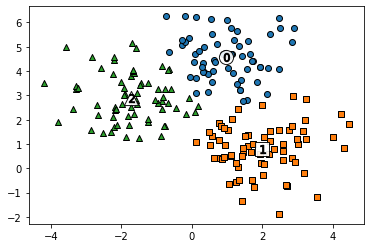

In [ ]:
#KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# clusters_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label])

  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolors='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolors='k', marker='$%d$' % label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               60
        2                5
        1                2
1       1               66
        0                1
2       2               63
        0                2
        1                1
Name: kmeans_label, dtype: int64


# 2. 군집 평가(Clustser Evaluation)


## 1) 실루엣 분석의 개요

군집화 평가 방법으로 실루엣 분석(silhouette analysis)이 있다. **실루엣 분석**은 각 군집 간 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다. 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미이다. 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것이다.

실루엣 분석은 실루엣 계수(silhouette coefficient)를 기반으로 한다. 실루엣 계수는 개별 데이터가 가지는 군집화 지표이다. 개별 데이터가 가지는 **실루엣 계수**는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표다.

특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i), 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 b(i)를 기반으로 계산한다.

i번째 데이터 포인트의 실루엣 계수 값 s(i)는 다음과 같이 정의한다.
>s(i) = ( b(i) - a(i) ) / ( max( a(i), b(i) ) )

실루엣 계수는 -1에서 1 사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것이다. - 값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻한다.

사이킷런은 이러한 실루엣 분석을 위해 다음과 같은 메서드를 제공한다.
 - sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds) : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인터의 실루엣 계수를 계산해 반환한다.
 - sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds) : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣 계수 값을 평균해 반환한다. 즉, np.mean(silhouette_sample( ))이다. 일반적으로 이 값이 높을수록 군집화가 어느 정도 잘 됐다고 판단할 수 있다. 하지만 무조건 이 값이 높다고 해서 군집화가 잘 됐다고 판단할 수는 없다.

좋은 군집화가 되려면 다음 기준 조건을 만족해야 한다.
 1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score( ) 값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋다.
 2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다.

## 2) 붓꽃 데이터 세트를 이용한 군집 평가


In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수를 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수를 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


평균 실루엣 계수 값이 약 0.553인데, 1번 군집의 경우 0.8 이상의 높은 실루엣 계수 값을 보여준다. 이는 1번 군집이 아닌 다른 군집의 경우 실루엣 계수 값이 평균보다 낮기 때문일 것이다.

군집별 평균 실루엣 계수 값을 알아보도록 한다. IrisDF DataFrame에서 군집 칼럼별로 group by하여 silhouette_coeff 칼럼의 평균값을 구하면 된다.

In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

## 3) 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수는 없다. 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있다. 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 K-평균의 적절한 군집 개수가 설정됐다고 판단할 수 있다.

실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 각 데이터 별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어난다.

# 3. 평균 이동


## 1) 평균 이동(Mean Shift)의 개요

평균 이동(Mean Shift)은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다. K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동한다.

**평균 이동 군집화**는 데이터의 분포도를 이용해 군집 중심점을 찾는다. 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 이를 위해 확률 밀도 함수(probability density function)을 이용한다. 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)을 이용한다.

평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 취한다. 이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아낸다.

**KDE(Kernel Density Estimation)**는 커널(Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법이다. 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정한다. 확률 밀도 함수 PDF(Probability Density Function)는 확률 변수의 분포를 나타내는 함수로, 널리 알려진 정규분포 함수를 포함해 감마 분포, t-분포 등이 있다. 확률 밀도 함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성(가령 정규 분포의 경우 평균, 분산), 확률 분포 등 변수의 많은 요소를 알 수 있다.

KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며, 대표적인 커널 함수로서 가우시안 분포 함수가 사용된다.

KDE는 다음과 같은 커널 함수 식으로 표현된다. 다음 식에서 K는 커널 함수, x는 확률 변숫값, xi는 관측값, h는 대역폭(bandwidth)이다.

> KDE = 1/n ∑Kh(x - xi) = 1/(n * h) ∑K((x-xi)/h)

대역폭 h는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용되며, 이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우한다. 작은 h값(h=1.0)은 좁고 뾰족한 KDE를 가지게 되며, 이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합(over-fitting)하기 쉽다. 반대로 매우 큰 h 값(h=10)은 과도하게 평활화(smoothing)된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 결과적으로 과소적합(under-fitting)하기 쉽다.

사이킷런은 평균 이동 군집화를 위해 **MeanShift** 클래스를 제공한다. MeanShift 클래스의 가장 중요한 초기화 파라미터는 bandwidth이며 이 파라미터는 KDE의 대역폭 h와 동일하다. 대역폭 크기 설정이 군집화의 품질에 큰 영향을 미치기에 사이킷런은 최적의 대역폭 계산을 위해 estimate_bandwidth( ) 함수를 제공한다.

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


군집이 0부터 5까지 6개로 분류됐다. 지나치게 세분화돼 군집화된 것이다. 일반적으로 bandwidth 값을 작게 할수록 군집 개수가 많아진다. 이번에는 bandwidth를 살짝 높인 1.0으로 해서 MeanShift를 수행한다.


In [ ]:
meanshift=MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


데이터의 분포 유형에 따라 bandwidth 값의 변화는 군집화 개수에 큰 영향을 미칠 수 있다. 따라서 MeanShift에서는 이 bandwidth를 최적화 값으로 설정하는 것이 매우 중요하다. 사이킷런은 최적화된 bandwidth 값을 찾기 위해서 **estimate_bandwidth( )** 함수를 제공한다. estimate_bandwidth( )의 파라미터로 피처 데이터 세트를 입력해주면 최적화된 bandwidth 값을 반환해준다.

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


estimate_bandwidth( )로 측정된 bandwidth를 평균 이동 입력값으로 적용해 동일한 make_blobs( ) 데이터 세트에 군집화를 수행한다.

In [ ]:
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


3개의 군집으로 구성됨을 알 수 있다. 구성된 3개의 군집을 시각화한다. 평균 이동도 K-평균과 유사하게 중심ㅇ르 가지고 있으므로 cluster_centers_ 속성으로 군집 중심 좌표를 표시할 수 있다.


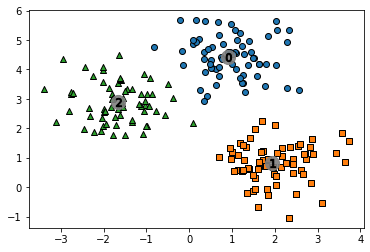

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x','*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y = centers[label]

  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label])

  # 군집별 중심 표현
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9)
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', marker='$%d$' % label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


target 값과 군집 label 값을 비교하면 1:1로 잘 매칭되었음을 확인할 수 있다.

평균 이동의 장점은 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능하다. 또한 이상치의 영향력도 크지 않으며, 미리 군집의 개수를 정할 필요도 없다. 하지만 알고리즘의 수행이 오래 걸리고 무엇보다도 bandwidth의 크기에 따른 군집화 영향도가 매우 크다.

# 4. GMM(Gaussian Mixture Model)


## 1) GMM 소개

**GMM 군집화**는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(GaussianDistribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식이다. 정규 분포(Normal distribution)로도 알려진 가우시안 분포는 좌우 대칭형의 종(Bell) 형태를 가진 통계학에서 가장 잘 알려진 연속 확률 함수이다.

정규 분포는 평균 µ를 중심으로 높은 데이터 분포도를 가지고 있으며, 좌우 표준편차 1에 전체 데이터의 68.27%, 좌우 표준편차 2에 전체 데이터의 95.45%를 가지고 있다. 평균이 0이고, 표준편차가 1인 정규 분포를 **표준 정규 분포**라고 한다.

GMM(Gaussian Mixture Model)은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주한다. 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출한다.

전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식이다. 가령 1000개의 데이터 세트가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중에 어떤 정규 분포에 속하는지 결정하는 방식이다.

이와 같은 방식은 GMM에서는 **모수 추정**이라고 하는데, 모수 추정은 대표적으로 2가자를 추정하는 것이다.
 - 개별 정규 분포의 평균과 분산
 - 각 데이터가 어떤 정규 분포에 해당되는지의 확률

 이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용한다. EM 알고리즘에 대한 설명은 더 많은 수학식이 필요하기에 생략한다. 사이킷런은 이러한 GMM의 EM 방식을 통한 모수 추정 군집화를 지원하기 위해 GaussianMixture 클래스를 지원한다.


## 2) GMM을 이용한 붓꽃 데이터 세트 군집화

GMM은 확률 기반 군집화이고 K-평균은 거리 기반 군집화이다. 붓꽃 데이터 세트로 이 두 가지 방식을 이용해 군집화를 수행한 뒤 양쪽 방식을 비교한다.

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

GaussianMixture 객체의 가장 중요한 초기화 파라미터는 n_components이다. n_components는 gaussian mixture의 모델의 총 개수이다 K-평균의 n_clusters와 같이 군집의 개수를 정하는 데 중요한 역할을 한다. n_components를 3으로 설정하고 GaussianMixture로 군집화를 수행한다(GaussianMixture 클래스는 sklearn.mixture 패키지에 위치함을 주의).

In [2]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


앞 절의 붓꽃 데이터 세트의 K-평균 군집화 결과보다 더 효과적인 분류 결과가 도출 됐다. K-평균 군집화를 수행한 결과를 본다.

In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       2                 48
        0                  2
2       0                 36
        2                 14
Name: kmeans_cluster, dtype: int64


이는 어떤 알고리즘이 더 뛰어나다는 의미가 아니라 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이라는 의미이다. K-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식이므로 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행될 수 있다.

## 3) GMM과 K-평균의 비교

KMeans는 원형의 범위에서 군집화를 수행한다. 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아진다. KMeans는 대표적으로 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못한다. 다음에서 해당 데이터 세트를 make_blobs( )의 데이터를 변환해 만들어본다. 앞으로도 군집을 자주 시각화하므로 이를 위한 별도의 함수를 만든다.

visualize_cluster_plot( ) 함수는 인자로 다음과 같은 값을 입력받는다.
- **clusterobj** : 사이킷런의 군집 수행 객체. KMeans나 GaussianMixture의 fit( )와 predict( )로 군집화를 완료한 객체. 만약 군집화 결과 시각화가 아니고 make_blobs( )로 생성한 데이터의 시각화일 경우 None 입력
- **dataframe** : 피처 데이터 세트와 label 값을 가진 DataFrame
- **label_name** : 군집화 결과 시각화일 경우 dataframe 내 군집화 label 칼럼 명, make_blobs( ) 결과 시각화일 경우는 dataframe 내의 target 칼럼 명
- **iscenter** : 사이킷런 cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False 

In [5]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

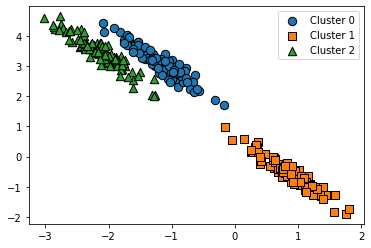

In [7]:
from sklearn.datasets import make_blobs

# make_blobs( )로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X_aniso = np.dot(X, transformation)
# feature 데이터 세트와 make_blobs( )의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

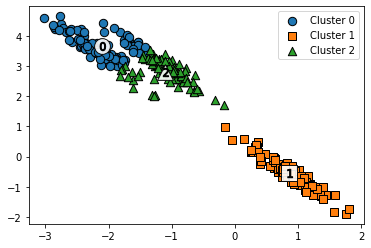

In [9]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

KMeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하느 방향으로 구성되지 않음을 알 수 있다. KMeans가 평균 거리 기반으로 군집화를 수행하므로 같은 거리상 원형으로 군집을 구성하면서 위와 같이 길쭉한 방향으로 데이터가 밀접해 있을 경우에는 최적의 군집화가 어렵다.

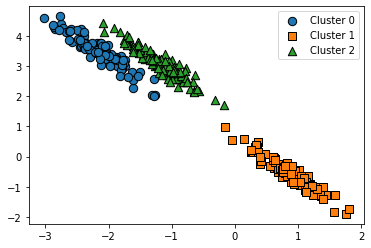

In [10]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscluster를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

데이터가 분포된 방향에 따라 정확하게 군집화됐음을 알 수 있다. GMM은 K-평균과 가드레 군집의 중심 좌표를 구할 수 없기에 군집 중심 표현이 visualize_cluster_plot( )에서 시각화되지 않는다.

In [11]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


이처럼 GMM의 경우 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있다. 하지마 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있다.

# 5. DBSCAN

## 1) DBSCAN 개요

밀도 기반 군집화의 대표적인 알고리즘인 DBSCAN(Density Based Spatial Clustering of Applications with Noise)에 대해 알아보도록 한다. DBSCAN은 간단하고 직관적인 알고리즘으로 돼있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화를 할 수 있다. DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있기 때문이다.

DBSCAN을 구성하는 가장 중요한 두 가지 파라미터는 입실론(epsilon)으로 표기하는 주변 영역과 이 입실론 주변 영역에 포함되는 최소 데이터의 개수 min points이다.
 - **입실론 주변 영역(epsilon)** : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역이다.
 - **최소 데이터 개수(min points)** : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수이다.

입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의한다.
 - **핵심 포인트(Core Point)** : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라 한다.
 - **이웃 포인트(Neighbor Point)** : 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 한다.
 - **경계 포인드(Border Point)** : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라 하낟.
 - **잡음 포인트(Noise Point)** : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고 한다.

핵심 포인트의 이웃 데이터 포인트 역시 핵심 포인트일 경우 연결하여 직접 접근이 가능하다. 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성한다. 이러한 방식으로 점차적으로 군집(Cluster) 영역을 확장해 나가는 것이 DBSCAN 군집화 방식이다.

DBSCAN은 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하 알고리즘을 지원한다. 다음과 같은 주요한 초기화 파라미터를 가지고 있다.
 - **eps** : 입실론 주변 영역의 반경을 의미한다.
 - **min_samples** : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터 최소 개수를 의미한다(자신의 데이터를 포함한다. 위에서 설명한 min points +1).

## 2) DBSCAN 적용하기 - 붓꽃 데이터 세트

DBSCAN 클래스를 이용해 붓꽃 데이터 세트를 군집화한다. eps=0.6, min_samples=8로 한다. 일반적으로 eps 값으로는 1 이하의 값을 설정한다.

In [13]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6 ,min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


0과 1 이외에 특이하게 -1이 군집 레이블로 있는 것을 알 수 있다. 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미한다. 따라서 위 붓꽃 데이터 세트는 DBSCAN에서 0과 1 두 개의 군집으로 군집화됐다. Target 값의 유형이 3가지인데, 군집이 2개가 됐다고 군집화 효율이 떨어진다는 의미는 아니다. DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미하다고 할 수 있다. 특히 붓꽃 데이터 세트는 군집을 3개로 하는 것보다 2개로 하는 것이 군집화의 효율로서 더 좋은 면이 있다.

DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환한 뒤, 앞 예제에서 사용한 visualize_cluster_plot( ) 함수를 이용해 시각화한다. visualize_cluster_plot( ) 함수 인자로 사용하기 위해 irisDF의 'ftr1', 'ftr2' 칼럼에 PCA로 변환된 피처 데이터 세트를 입력한다.

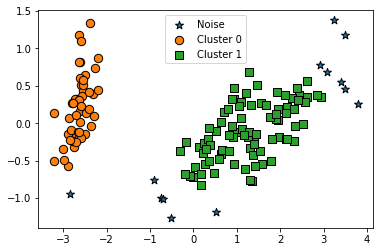

In [14]:
from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_plot( ) 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

별표로 표현된 값은 모두 노이즈이다.

DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋다. DBSCAN 알고리즘에 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 게 중요하다. 일반적으로 eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아진다. min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 된다.

## 3) DBSCAN 적용하기 - make_circles( ) 데이터 세트

복잡한 기하학적 분포를 가지는 데이터 세트에서 DBSCAN과 타 알고리즘을 비교한다. 먼저 make_circles( ) 함수를 이용해 내부 원과 외부 원 형태로 돼 있는 2차원 데이터 세트를 만들어 본다. make_circles( ) 함수는 오직 2개의 피처만을 생성하므로 별도의 피처 개수를 지정할 필요가 없다. 파라미터 noise는 노이즈 데이터 세트의 비율이며, factor는 외부 원과 내부 원의 scale 비율이다.

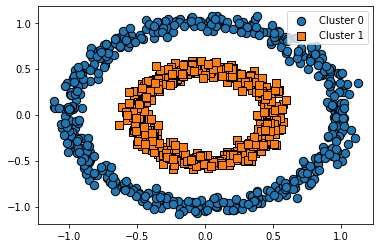

In [16]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

DBSCAB이 이 데이터 세트를 군집화한 결과를 보기 전에 먼저 K-평균과 GMM은 어떻게 이 데이터를 군집화하는 지 확인한다.

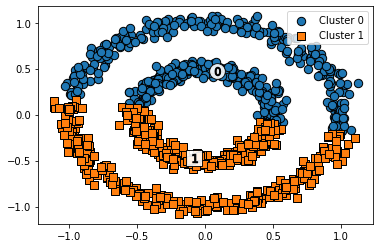

In [17]:
# KMeans로 make_circles( ) 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

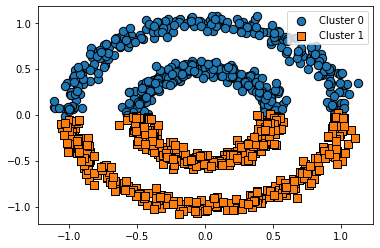

In [18]:
# GMM으로 make_circles( ) 데이터 세트를 군집화 수행.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

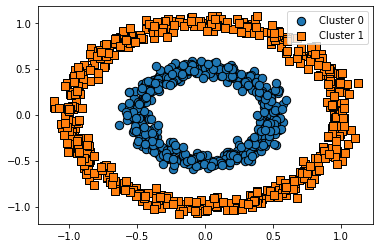

In [20]:
# DBSCAN으로 make_circles( ) 데이터 세트 군집화 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

# 6. 군집화 실습 - 고객 세그먼테이션


## 1) 고객 세그먼테이션의 정의와 기법

**고객 세그먼테이션(Customer Segmentation)**은 다양한 기준으로 고객을 분류하는 기법을 지칭한다.

고객을 분류하는 요소는 여러 가지가 있지만, 고객 분류가 사용되는 대부분의 비즈니스가 상품 판매에 중점을 두고 있기 때문에 더 중요한 분류 요소는 어떤 상품을 얼마나 많은 비용을 써서 얼마나 자주 사용하는 가에 기반한 정보로 분류하는 것이 보통이다. 기업 입장에선 얼마나 많은 매출을 발생하느냐가 고객 기준을 정하는 중요한 요소이다.

고객 세그먼테이션의 주요 목표는 타깃 마케팅이다. **타깃 마케팅**이란 고객을 여러 특성에 맞게 세분화해서 그 유형에 따라 맞춤형 마케팅이나 서비스를 제공하는 것이다.

고객 세그먼테이션은 고객의 어떤 요소를 기반으로 군집화할 것인가를 결정하는 것이 중요한데, 여기선 기본적인 고객 분석 요소인 RFM 기법을 이용한다. **RFM 기법**은 Recency(R), Frequency(F), Monetary Value(M)의 앞글자를 합한 것으로서 각 단어의 의미는 다음과 같다.
 - **RECENCY (R)** : 가장 최근 상품 구입 일에서 오늘까지의 기간
 - **FEQUENCY (F)** : 상품 구매 횟수
 - **MONETARY VALUE(M)** : 총 구매 금액
 

## 2) 데이터 세트 로딩과 데이터 클렌징

예제에 사용할 데이터 세트는 http://archive.ics.uci.edu/ml/datasets/online+retail 에서 내려 받는다.

In [22]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='/content/drive/MyDrive/데이터분석/파이썬머신러닝완벽가이드/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [23]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


먼저 사전 정제 작업이 필요하다.
 - Null 데이터 제거 : 특히 CustomerID가 Null인 데이터가 많다. 고객 세그먼테이션을 수행하므로 고객 식별 변호가 없는 데이터는 필요가 없기에 삭제한다.
 - 오류 데이터 삭제 : 대표적인 오류 데이터는 Quality 또는 UnitPrice가 0보다 작은 경우이다. 사실 Quantitiy가 0보다 작은 경우는 오류 데이터라기보다는 반환을 뜻하는 값이다. 이 경우 InvoiceNo의 앞자리는 'C'로 돼 있다. 분석의 효율성을 위해 이 데이터는 모두 삭제한다.

In [24]:
retail_df = retail_df[retail_df['Quantity']>0]
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [25]:
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

Country 칼럼은 주문 고객 국가이다. 주요 주문 고객은 영국인데, 이 외에도 EU의 여러 나라와 영연방 국가들이 포함돼 있다. 영국이 대다수를 차지하므로 다른 국가의 데이터는 모두 제외하겠다.

In [26]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


## 3) RFM 기반 데이터 가공

먼저 'UnitPrice'와 'Quantity'를 곱해서 주문 금액 데이터를 만든다. 그리고 CustomerNo도 더 편리한 식별성을 위해 float 형을 int형으로 변경한다.

In [37]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)


해당 온라인 판매 데이터 세트는 주문 횟수와 주문 금액이 압도적으로 특정 고객에게 많은 특성을 가진다. 개인 고객의 주문과 소매점의 주문이 함께 포함돼 있기 때문이다. Top-5 주문 건수와 주문 금액을 가진 고객 데이터를 추출한다.

In [38]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


수행하려는 RFM 기반의 고객 세그먼테이션은 고객 레벨로 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 해 세그먼테이션을 수행하는 것이다. 이에 주문번호+상품코드 기준의 데이터를 Recency, Frequency, Monetary value 데이터로 변경한다. 이를 위해서는 주문번호 기준의 데이터를 개별 고객 기준의 데이터로 Group by를 해야 한다.

주문번호 기준의 retail_df DataFrame에 groupby('CustomerID')를 적용해 CustomerID 기준으로 DataFrame을 새로 생성한다. DataFrame의 groupby( )만 사용해서는 여러 개의 칼럼에 서로 다른 aggregation 연산, 예를 들어 count( )나 max( )를 한 번에 수행하기 어렵다. 이를 해결하기 위해서 DataFrame에 groupby를 호출해 반환된 DataFrameGroupby 객체에 agg( )를 이용한다. agg( )에 인자로 대상 칼럼들과 aggregation 함수명들을 딕셔너리 형태로 입력하면 칼럼 여러 개의 서로 다른 aggregation 연산을 쉽게 수행할 수 있다. Frequency는 고객별 주문 건수 이므로 'CustomerID'로 groupby( )해서 'InvoiceNo'의 count( ) aggregation으로 구한다. Monetary value는 고객별 주문 금액이므로 'CustomerID'로 groupby( )해서 'sale_amount'의 sum( ) aggregation으로 구한다. Recency의 경우 두 번의 가공 작업을 수행한다. 'CustomerID'로 groupby( )해서 'InvoiceData' 칼럼의 max( )로 고객별 가장 최근 주문 일자를 먼저 구한 뒤 추후에 가공 작업을 별도로 수행한다.

In [39]:
# DataFrame의 groupby()의 multiplt 연산을 위해 agg() 이용
# Recency는 InvoiceData 칼럼의 max()에서 데이터 가공
# Frequency는 InvoiceNo 칼럼의 count(), Monetary value는 sale_amount 칼럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo' :'count',
    'sale_amount' : 'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns ={'InvoiceDate':'Recency',
                                   'InvoiceNo':'Frequency',
                                   'sale_amount':'Monetary'})

cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


Recency 칼럼은 개별 고객당 가장 최근의 주문인데, 데이터 값의 특성으로 인해 아직 데이터 가공이 추가로 필요하다. Recency는 고객이 가장 최근에 주문한 날짜를 기반으로 하는데, 오늘 날짜를 기준으로 가장 최근 주문 일자를 뺀 날짜이다. 주의할 점은 오늘 날짜를 현재 날짜로 해서는 안된다는 것이다. 온라인 판매 데이터가 2010년 12월 1일에서 2011년 12월 9일까지의 데이터이므로 오늘 날짜는 2011년 12월 9일에서 하루 더한 2011년 12월 10일로 한다. 2011년 12월 10일을 현재 날짜로 간주하고 가장 최근의 주문 일자를 뺀 데이터에서 일자 데이터(days)만 추출해 생성한다.

In [40]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)


cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


이제 고객별로 RFM 분석에 필요한 Recency, Frequency, Monetary 칼럼을 모두 생성했다. 다음으로 생성된 고객 RFM 데이터 세트의 특성을 개괄적으로 알아보고 RFM 기반에서 고객 세그먼테이션을 수행한다.

## 4) RFM 기반 고객 세그먼테이션

앞에서도 언급했지만, 온라인 판매 데이터 세트는 소매업체의 대규모 주문을 포함한다. 이들은 주문 회숫와 주문 금액에서 개인 고객 주문과 매우 큰 차이를 나타내고 있으며 이로 인해 매우 왜곡된 데이터 분포도를 가지게 되어 군집화가 한쪽 군집에만 집중되는 현상이 발생한다. 먼저 온라인 판매 데이터 세트의 칼럼별 히스토그램을 확인하고, 이처럼 왜곡된 데이터 분포도에서 군집화를 수행할 때 어떤 현상이 발생하는지를 알아본다.

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <a list of 10 Patch objects>)

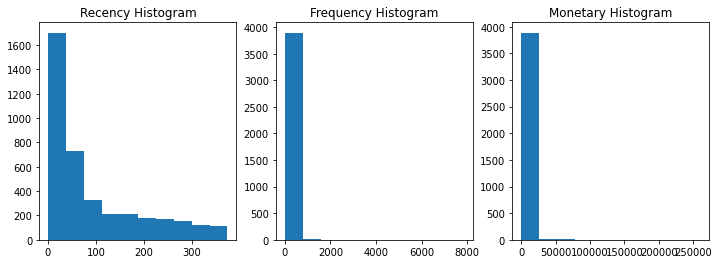

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1,ncols=3)

ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

세 값 모두 왜곡된 데이터 값 분포도를 가지고 있다. 각 칼럼의 데이터 값 백분위로 대략적으로 어떻게 값이 분포돼 있는지 확인한다.

In [42]:
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


왜곡 정도가 매우 높은 데이터 세트에 K-평균 군집을 적용하면 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행된다. 먼저 데이터 세트를 StandardScaler로 평균과 표준편차를 재조정한 뒤 K-평균을 수행한다.

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.592


군집을 3개로 구성할 경우 전체 군집의 평균 실루엣 계수인 실루엣 스코어는 0.592로 안정적인 수치가 나왔다. 하지만 각 군집별 실루엣 계수는 어떨까? visualized_silhouette( ) 함수와 군집 개수별로 군집화 구성을 시각화하는 visualize_kmeans_plot_multi( ) 함수를 새롭게 생성하여 군집 개수를 2~5개까지 변화시키면서 개별 군집의 실루엣 계수 값과 데이터 구성을 알아본다.

In [50]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


In [49]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()


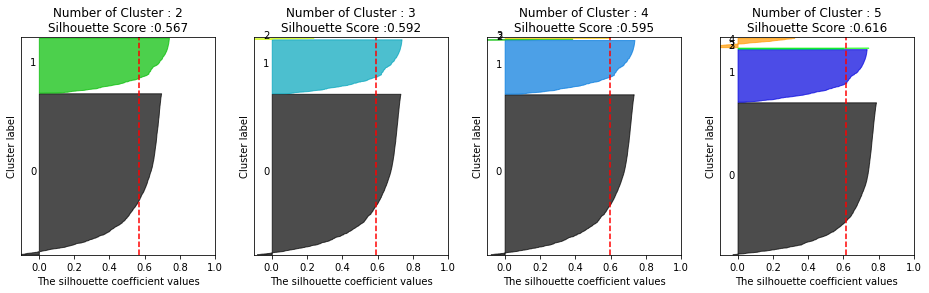

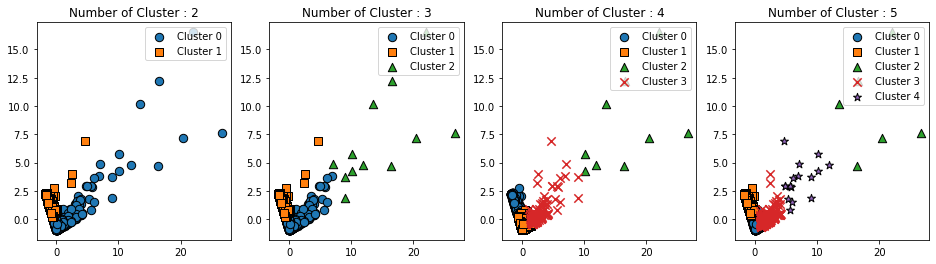

In [52]:
visualize_silhouette([2,3,4,5], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

이 데이터 세트의 경우 데이터 값이 거리 기반으로 광범위하게 퍼져 있어서 군집 수를 계속 늘려봐야 이 군집만 지속적으로 분리하게 되기에 의미 없는 군집화 결과로 이어진다.

이처럼 지나치게 왜곡된 데이터 세트는 K-평균과 같은 같은 거리 기반 군집화 알고리즘에서 지나치게 일반적인 군집화 결과를 도출하게 된다.

비지도학습 알고리즘의 하나인 군집화의 기능적 의미는 숨어 있는 새로운 집단을 발견하는 것이다. 새로운 군집 내의 데이터 값을 분석하고 이해함으로써 이 집단에 새로운 의미를 부여할 수 있다. 이를 통해 전체 데이터를 다른 각도로 바라볼 수 있게 만들어준다.

데이터 세트의 왜곡 정도를 낮추기 위해 가장 자주 사용되는 방법은 데이터 값에 로그(Log)를 적용하는 로그 변환이다.

In [54]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))


실루엣 스코어는 : 0.303


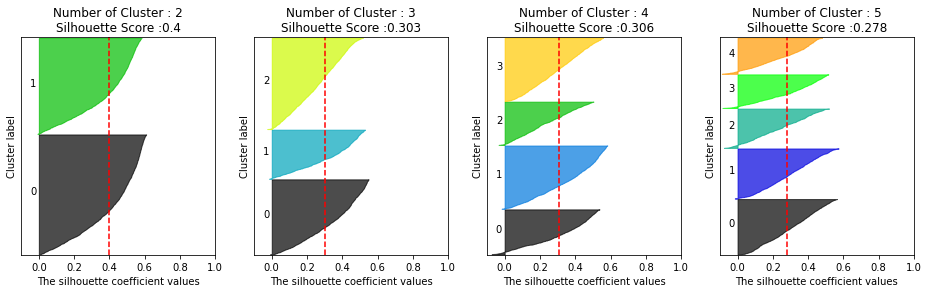

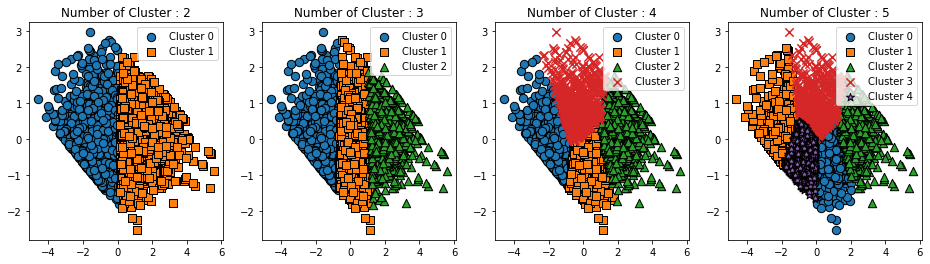

In [55]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)


실루엣 스코어는 로그 변환하기 전보다 떨어진다. 하지만 실루엣 스코어의 절대치가 중요한 것이 아님을 앞의 예제에서 잘 알 수 있다. 어떻게 개별 군집이 더 균일하게 나뉠 수 있는지가 더 중요하다.

위의 그래프를 보면 실루엣 스코어는 로그 변환하기 전보다 떨어지지만 앞의 경우보다 더 균일하게 군집화가 구성됐음을 알 수 있다. 이처럼 왜곡된 데이터 세트에 대해서는 로그 변환으로 데이터를 일차 변환한 후에 군집화를 수행하면 더 나은 결과를 도출할 수 있다.

# 7. 정리

각 군집화 기법은 나름의 장/단점이 있으며, 군집화하려는 데이터으 특성에 맞게 선택해야 한다. **K-평균**의 경우 거리 기반으로 군집 중심점을 이동시키면서 군집화를 수행한다.

**평균 이동(Mean Shift)**은 K-평균과 유사하지만 거리 중심이 아니라 데이터가 모여있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화를 수행한다.

**GMM(Gaussian Mixture Model) 군집화**는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(Gaussian Distribution)를 모델을 섞어서 생성된 모델로 가정해 수행하는 방식이다. 전체 데이터 세트에서 서로 다른 정규 분포 형태를 추출해 이렇게 다른 정규 분포를 가진 데이터 세트를 각각 군집화하는 것이다.

**DBSCAN(Density Based Spatial Clustering of Application은 입실론 주변 영역 내에 포함되는 최소 데이터 개수의 충족 여부에 따라 데이터 포인트를 핵심 포인트, 이웃 포인트, 경계 포인트, 잡음 포인트로 구분하고 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성하는 방식이다.